In [84]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [85]:
mnist_train = pd.read_csv('mnist_train.csv')
mnist_test = pd.read_csv('mnist_test.csv')
x_test = mnist_test.drop('label', axis=1)
y_test = mnist_test['label']
y_test = to_categorical(y_test,num_classes=10)
difference_in_accuracy = []
correlations = []

In [86]:
# Define a common neural network architecture
def create_neural_network(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [87]:
samples_per_class = 100
selected_data =[]
for i in range (10):
    selected_data_1 = pd.DataFrame()
    for class_label in range(10):
        class_data = mnist_train[mnist_train['label']==class_label]
        next_samples = class_data.iloc[i*samples_per_class:(i+1)*samples_per_class]
        selected_data_1=pd.concat([selected_data_1, next_samples])
    selected_data.append(selected_data_1)

In [88]:
for i in range(10):
    for j in range (10):
        if(i<j):
            
            model_1_train = selected_data[i].drop('label', axis=1)
            model_1_label = selected_data[i]['label']
            model_1_label = to_categorical(model_1_label,num_classes=10)
            model_2_train = selected_data[j].drop('label', axis=1)
            model_2_label = selected_data[j]['label']
            model_2_label = to_categorical(model_2_label,num_classes=10)
            # Create the neural networks
            model_1=create_neural_network(model_1_train.shape[1], 10)
            model_2=create_neural_network(model_2_train.shape[1], 10)
            # Train the models
            model_1.fit(model_1_train, model_1_label, epochs=30, batch_size=32, validation_split=0.2, verbose=0)
            model_2.fit(model_2_train, model_2_label, epochs=30, batch_size=32, validation_split=0.2, verbose=0)
            initial_accuracy_1 = model_1.evaluate(x_test, y_test, verbose=0)[1]
            initial_accuracy_2 = model_2.evaluate(x_test, y_test, verbose=0)[1]
            alpha = 0.5
            iterations = 20

            accuracy_array_1 = []
            accuracy_array_2 = []
            max_accuracy_1 = 0
            max_accuracy_2 = 0

            for k in range(iterations):
            # Get the weights of the models
                weight_1 = model_1.get_weights()
                weight_2 = model_2.get_weights()

                # Calculate the average weights
                blended_weights = [alpha * w0 + (1 - alpha) * w1 for w0, w1 in zip(weight_1, weight_2)]

                # Update the initial models with the averaged weights
                model_1.set_weights(blended_weights)
                model_2.set_weights(blended_weights)
                # Train the models but dont print the logs
                model_1.fit(model_1_train, model_1_label, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
                model_2.fit(model_2_train, model_2_label, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

                # Evaluate the models and dont print the accuracy
                accuracy_1 = model_1.evaluate(x_test, y_test, verbose=0)[1]
                accuracy_2 = model_2.evaluate(x_test, y_test, verbose=0)[1]
                max_accuracy_1 = max(max_accuracy_1, accuracy_1)
                max_accuracy_2 = max(max_accuracy_2, accuracy_2)
                accuracy_array_1.append(accuracy_1)
                accuracy_array_2.append(accuracy_2)
                # print(k)
            #save the plots of accuracy
            plt.plot(accuracy_array_1)
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Model 1'], loc='upper left')
            plt.savefig('accuracy_plot_'+str(i)+'_'+str(j)+'1.png')
            plt.close()
            plt.plot(accuracy_array_2)
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Model 2'], loc='upper left')
            plt.savefig('accuracy_plot_'+str(i)+'_'+str(j)+'2.png')
            plt.close()
            difference_in_accuracy.append((max_accuracy_1-initial_accuracy_1+max_accuracy_2-initial_accuracy_2)/2)
            cur_data_1= selected_data[i].drop('label', axis=1)
            cur_data_2= selected_data[j].drop('label', axis=1)
            correlations.append(np.corrcoef(cur_data_1, cur_data_2).mean())
            print('Done with model ', i, ' and ', j)
            print(len(difference_in_accuracy))
            print(len(correlations))
            
            

Done with model  0  and  1
1
1
Done with model  0  and  2
2
2
Done with model  0  and  3
3
3
Done with model  0  and  4
4
4
Done with model  0  and  5
5
5
Done with model  0  and  6
6
6
Done with model  0  and  7
7
7
Done with model  0  and  8
8
8
Done with model  0  and  9
9
9
Done with model  1  and  2
10
10
Done with model  1  and  3
11
11
Done with model  1  and  4
12
12
Done with model  1  and  5
13
13
Done with model  1  and  6
14
14
Done with model  1  and  7
15
15
Done with model  1  and  8
16
16
Done with model  1  and  9
17
17
Done with model  2  and  3
18
18
Done with model  2  and  4
19
19
Done with model  2  and  5
20
20
Done with model  2  and  6
21
21
Done with model  2  and  7
22
22
Done with model  2  and  8
23
23
Done with model  2  and  9
24
24
Done with model  3  and  4
25
25
Done with model  3  and  5
26
26
Done with model  3  and  6
27
27
Done with model  3  and  7
28
28
Done with model  3  and  8
29
29
Done with model  3  and  9
30
30
Done with model  4  and  5
3

In [104]:
print(difference_in_accuracy)
print(correlations)
print(len(difference_in_accuracy))
print(len(correlations))
# Save the results
np.save('difference_in_accuracy.npy', difference_in_accuracy)
np.save('correlations.npy', correlations)
# send these to a txt file
with open('difference_in_accuracy.txt', 'w') as f:
    for item in difference_in_accuracy:
        f.write("%s\n" % item)
with open('correlations.txt', 'w') as f:
    for item in correlations:
        f.write("%s\n" % item)

[0.039599984884262085, 0.058750003576278687, 0.045399993658065796, 0.0475500226020813, 0.04424998164176941, 0.049649953842163086, 0.04330000281333923, 0.05754998326301575, 0.03804999589920044, 0.0317000150680542, 0.039000004529953, 0.046549975872039795, 0.03909999132156372, 0.03434997797012329, 0.030699968338012695, 0.04179999232292175, 0.037099987268447876, 0.05070000886917114, 0.04045000672340393, 0.03329998254776001, 0.020999997854232788, 0.039449989795684814, 0.04794999957084656, 0.02785000205039978, 0.035500019788742065, 0.03685000538825989, 0.044649988412857056, 0.030699968338012695, 0.05059999227523804, 0.04785004258155823, 0.042999982833862305, 0.04879996180534363, 0.04635000228881836, 0.042900025844573975, 0.036500006914138794, 0.027050018310546875, 0.029549986124038696, 0.03255000710487366, 0.036499977111816406, 0.03525000810623169, 0.038600027561187744, 0.031200021505355835, 0.02920001745223999, 0.0394500195980072, 0.04719999432563782]
[0.30490726746429253, 0.299833261096914

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


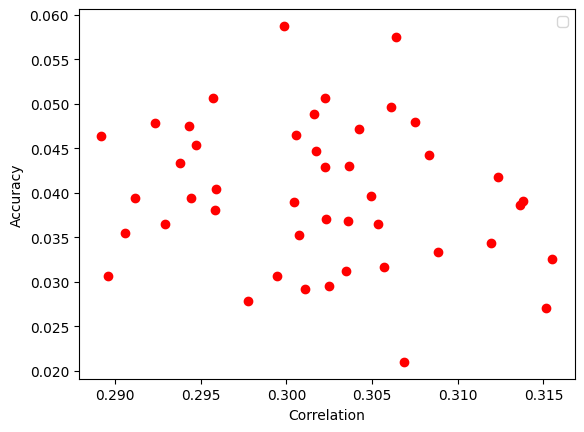

In [105]:
# plot the correlation and the corresponding accuracy
plt.plot(correlations, difference_in_accuracy, 'ro')
plt.xlabel('Correlation')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('correlation_accuracy.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-0.19400503742073855
0.09844360816938252


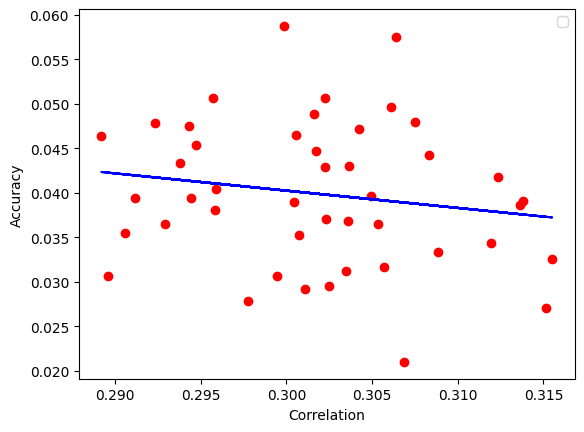

: 

In [107]:
# how to fit a regression line on the given plot and find the slope and intercept
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(correlations,difference_in_accuracy)
print(slope)
print(intercept)
# print the line on the plot
plt.plot(correlations, difference_in_accuracy, 'ro')
plt.xlabel('Correlation')
plt.ylabel('Accuracy')
plt.legend()
plt.plot(correlations, intercept + slope*np.array(correlations), 'b', label='fitted line')
plt.savefig('correlation_accuracy_fitted_line.png')
plt.show()
# send the slope and intercept to a txt file
with open('slope.txt', 'w') as f:
    f.write("%s\n" % slope)
with open('intercept.txt', 'w') as f:
    f.write("%s\n" % intercept)